In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

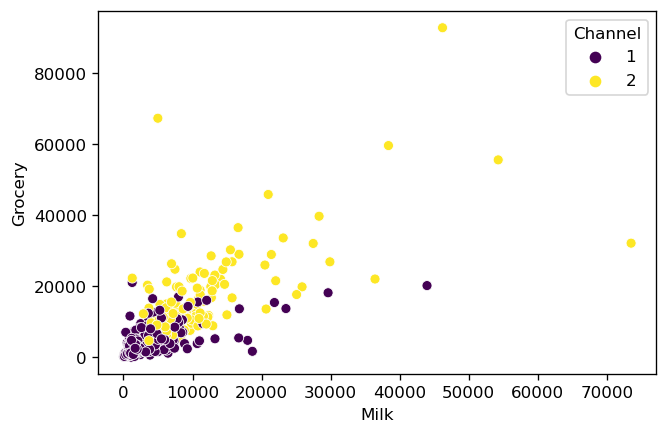

In [6]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x="Milk",y='Grocery',hue='Channel',palette='viridis')

In [7]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [8]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

<AxesSubplot:xlabel='Milk', ylabel='Count'>

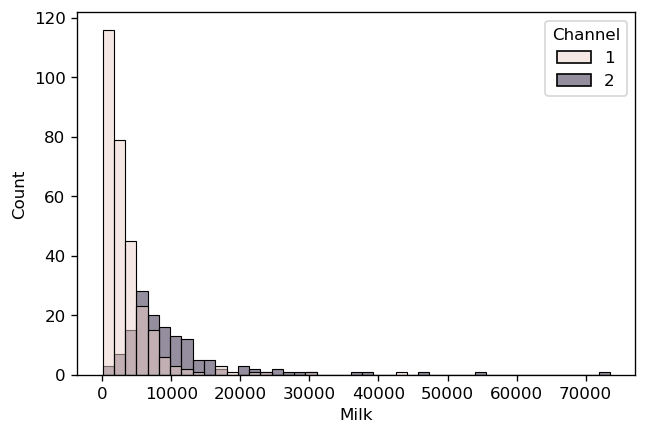

In [9]:
plt.figure(dpi=120)
sns.histplot(data=df,x='Milk',bins=45,hue='Channel')


<AxesSubplot:xlabel='Milk', ylabel='Count'>

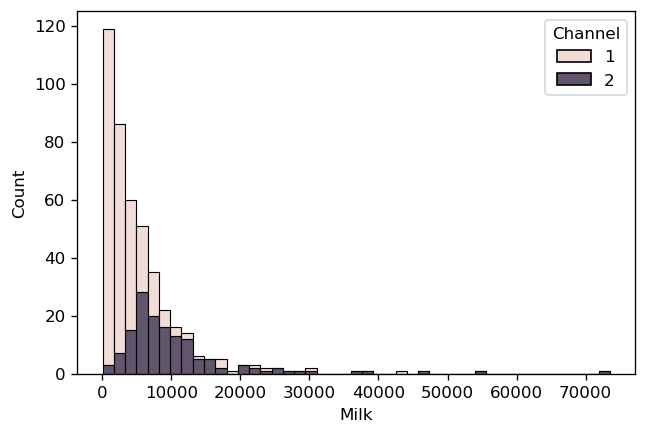

In [10]:
plt.figure(dpi=120)
sns.histplot(data=df,x='Milk',bins=45,hue='Channel',multiple='stack')

In [11]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


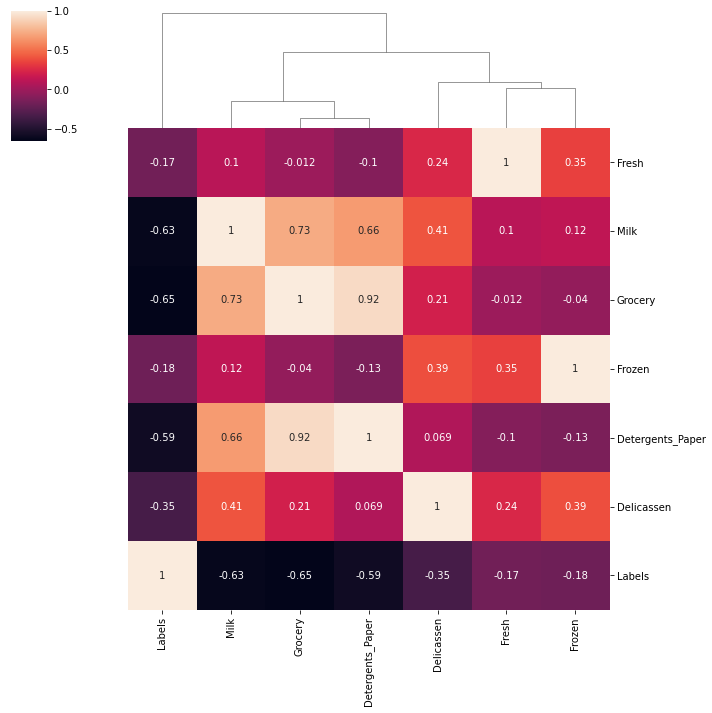

In [60]:
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True,row_cluster=False)

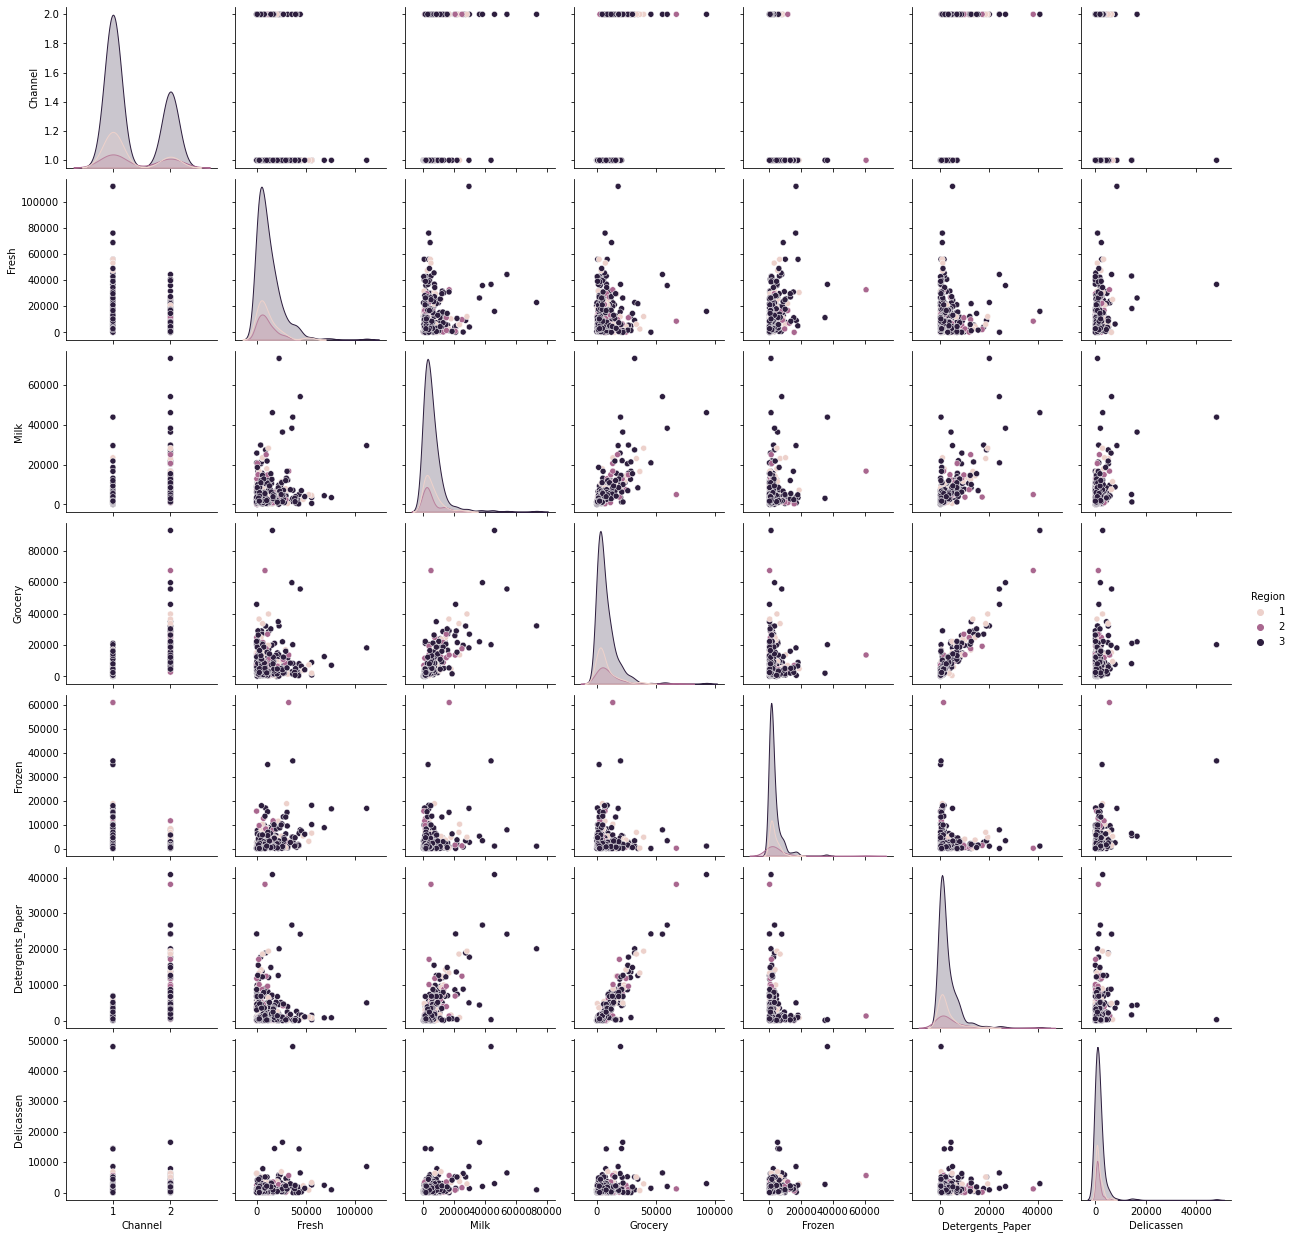

In [13]:
sns.pairplot(data=df,hue='Region')

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [15]:
scaler=StandardScaler()
X_s=scaler.fit_transform(df)
X_s

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [16]:
df.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [17]:
outliers=[]

for e in np.linspace(0.001,3,50):
    model=DBSCAN(min_samples=2*len(df.columns),eps=e)
    model.fit(X_s)
    outliers.append(np.sum(model.labels_==-1)/len(X_s))

In [18]:
outliers

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9613636363636363,
 0.8568181818181818,
 0.8181818181818182,
 0.7636363636363637,
 0.7363636363636363,
 0.7045454545454546,
 0.65,
 0.5681818181818182,
 0.47954545454545455,
 0.39545454545454545,
 0.325,
 0.27954545454545454,
 0.24545454545454545,
 0.22272727272727272,
 0.20909090909090908,
 0.20227272727272727,
 0.19318181818181818,
 0.17954545454545454,
 0.15,
 0.1431818181818182,
 0.125,
 0.10681818181818181,
 0.10227272727272728,
 0.08181818181818182,
 0.07727272727272727,
 0.07045454545454545,
 0.0659090909090909,
 0.06136363636363636,
 0.05227272727272727,
 0.04772727272727273,
 0.04772727272727273,
 0.045454545454545456,
 0.04090909090909091,
 0.038636363636363635,
 0.03636363636363636,
 0.03636363636363636,
 0.031818181818181815,
 0.031818181818181815,
 0.031818181818181815,
 0.031818181818181815,
 0.031818181818181815,
 0.029545454545454545,
 0.029545454545454545,
 0.02727272727272727,
 0.02727272727272727]

Text(0, 0.5, 'outlier rate')

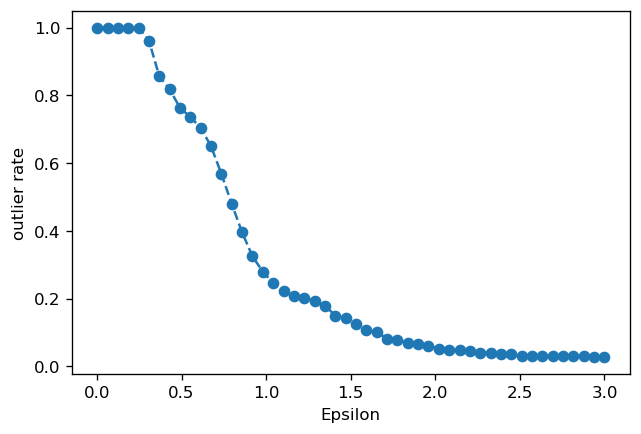

In [19]:
plt.figure(dpi=120)
plt.plot(np.linspace(0.001,3,50),outliers,'o--')
plt.xlabel("Epsilon")
plt.ylabel("outlier rate")


In [44]:
finalDBS=DBSCAN(eps=1.6,min_samples=2*(X_s.shape[1]))
clusters=finalDBS.fit_predict(X_s)

In [45]:
'''
eps=2
 1    286
 0    129
-1     25
dtype: int64
'''
finalDBS.get_params()
tmp=pd.Series(finalDBS.labels_)
tmp.value_counts()


 1    277
 0    116
-1     47
dtype: int64

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

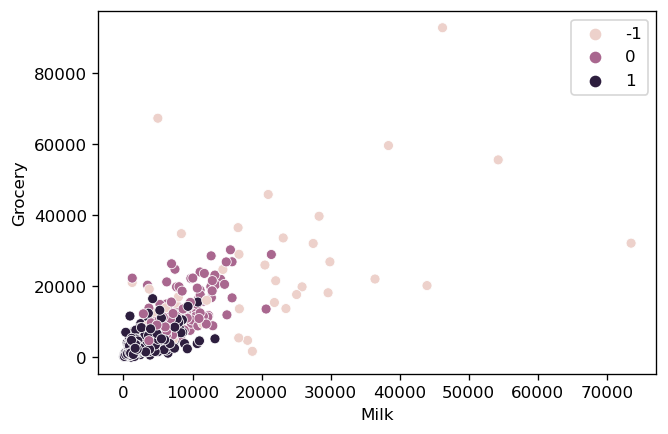

In [46]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x="Milk",y='Grocery',hue=clusters)

In [47]:
from sklearn.cluster import KMeans

In [48]:

km=KMeans(n_clusters=3)
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [49]:
km.fit(X_s)

C:\Users\George\.conda\envs\mlds\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

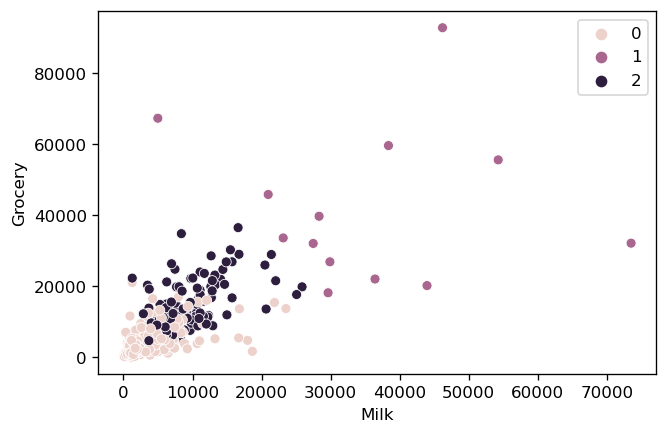

In [50]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x="Milk",y='Grocery',hue=km.labels_)

<AxesSubplot:xlabel='Milk', ylabel='Detergents_Paper'>

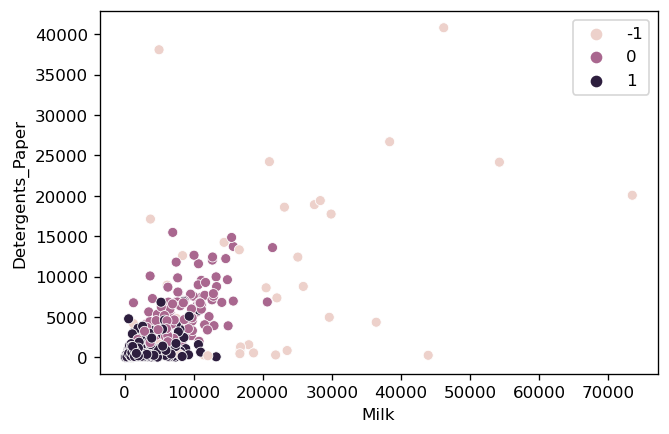

In [51]:
plt.figure(dpi=120)
sns.scatterplot(data=df,x="Milk",y='Detergents_Paper',hue=clusters)

In [52]:
df["Labels"]=finalDBS.labels_

In [53]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,-1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [54]:
CMeans=df.groupby('Labels').mean()
df.groupby('Labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,,,
-1,1.553191,2.255319,23540.787234,17499.702128,21162.553191,7979.063830,8235.553191,4817.659574
0,2.000000,2.698276,8216.353448,8257.586207,13221.250000,1381.086207,5755.387931,1376.439655
1,1.000000,2.527076,11626.776173,2779.750903,3502.732852,2947.393502,769.534296,1028.324910


In [55]:
from sklearn.preprocessing import  MinMaxScaler
mms=MinMaxScaler()

In [56]:
Scaled_means=pd.DataFrame(data=mms.fit_transform(CMeans),columns=CMeans.columns, index=CMeans.index)
pd.DataFrame(data=mms.fit_transform(CMeans),columns=CMeans.columns, index=CMeans.index)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,,,
-1,0.553191,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,1.000000,1.000000,0.000000,0.372137,0.550318,0.000000,0.667806,0.091867
1,0.000000,0.613506,0.222548,0.000000,0.000000,0.237392,0.000000,0.000000


<AxesSubplot:>

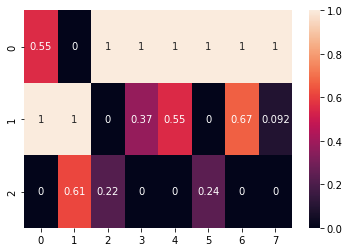

In [57]:
sns.heatmap(data=mms.fit_transform(CMeans),annot=True)

In [58]:
CMeans.drop(-1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,,,
0,2.0,2.698276,8216.353448,8257.586207,13221.250000,1381.086207,5755.387931,1376.439655
1,1.0,2.527076,11626.776173,2779.750903,3502.732852,2947.393502,769.534296,1028.324910


<AxesSubplot:ylabel='Labels'>

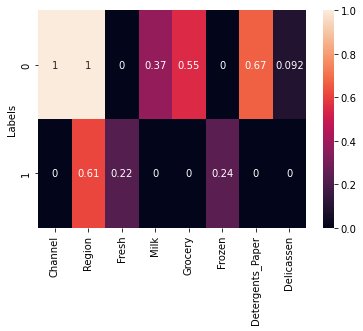

In [59]:
sns.heatmap(data=Scaled_means.drop(-1),annot=True)